In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Activity 08: Math Placement Tests

NCSSM offers students the ability to exempt math courses when they enroll in our program using a placement test process. Incoming students can attempt to exempt a course in Precalculus or a course in Calculus if they've already completed similar coursework before they enroll at NCSSM. The Math Department keeps track of the scores on the placement tests.

Run the cell below to load a sample of those placement tests from recent years.

In [2]:
placement_scores = Table.read_table('data/placement-tests.csv')
placement_scores

Course,Score
Precalculus,6
Precalculus,7
Precalculus,8
Precalculus,9
Precalculus,9
Precalculus,9
Precalculus,10
Precalculus,10
Precalculus,10
Precalculus,11


There are only two variables in this table:

|VARIABLE|DESCRIPTION|
|--------|-----------|
|Course|Data Type: String. The course that a student is attempting to exempt|
|Score|Data Type: Integer. The score the student earned on the test. Max score is 35|

## Exploring the Data

Use the `.group()` method on the `placement_scores` table to get a count of how many of each type of test is in the table. Save the result as a table named `placement_distribution`.

In [3]:
# You complete some code in this cell
placement_distribution = placement_scores.group('Course')
placement_distribution

Course,count
Calculus,76
Precalculus,270


Now, create a horizontal bar chart to help visualize the difference between the count of each type of test. 

Some criteria:
* Sort the distribution so the course with the highest count appears at the top of the bar chart.
* Give the chart a title using the plots.title() method> Revisit the lesson on Charts if you need a refresher.

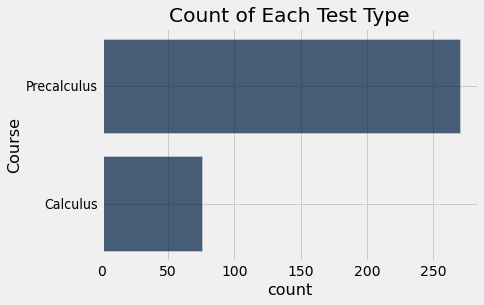

In [4]:
# You complete some code in this cell
placement_distribution.sort('count', descending=True).barh('Course')
plots.title('Count of Each Test Type');

## Distribution of Scores

Let's see how the students performed on these tests. Let's start by creating a histogram of the Precalculus scores. 

First, create a table named `precalculus` that only has the rows for individuals who were attempting to exempt Precalculus. 

Then, use the `.hist()` method on the Scores column to see how the scores are distributed. To get started, do not specify any bins, let the `.hist()` method make up it's own bins

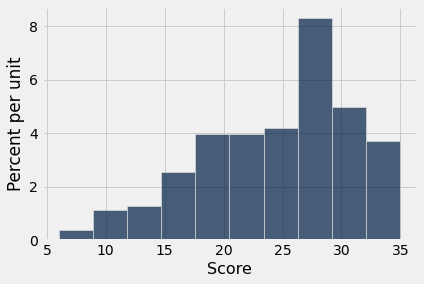

In [5]:
# You complete some code in this cell
precalculus = placement_scores.where('Course', 'Precalculus')
precalculus.hist('Score')

Now, try different bin sizes to see how your choice of bins alters how you might interpret the distribution of scores.

Some bins to try and their characteristics:
* $[0, 10), [10, 20), [20, 30), [30, 40)$ Equal widths of 10 units.
* $[0, 23), [23, 30), [30, 35)$ Unequal widths, but each bin contains roughly a third of the tests
* $[0,5), [5, 15), [15, 20), [20, 35)$. Unequal widths, alternating small and large
* $[0, 1), [1, 2), [2, 3), [3, 4), ..., [34, 35)$ Equal widths that reveal the count of each score
* some of your own!

In each distribution:
* try to estimate what percent of the tests fall into each bar (and approximately how many actual tests fall into the bar).
* use the `unit=` argument to label the horizontal scale as "points"

How do the bar widths impact your views of the data?

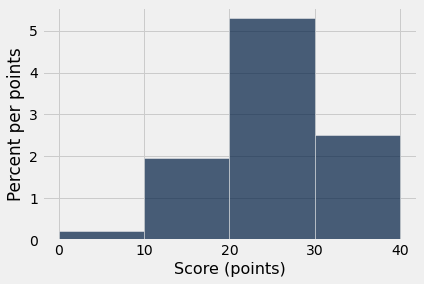

In [6]:
# You complete some code in this cell
precalculus.hist('Score', bins=make_array(0, 10, 20, 30, 40), unit="points")

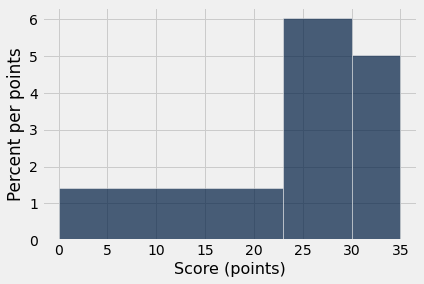

In [7]:
# You complete some code in this cell
precalculus.hist('Score', bins=make_array(0, 23, 30, 35), unit="points")

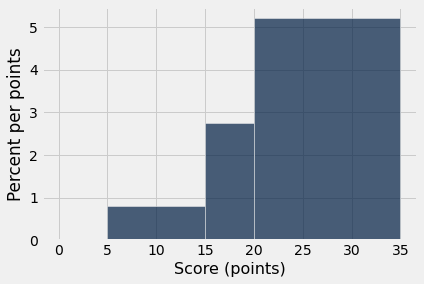

In [8]:
# You complete some code in this cell
precalculus.hist('Score', bins=make_array(0, 5, 15, 20, 35), unit="points")

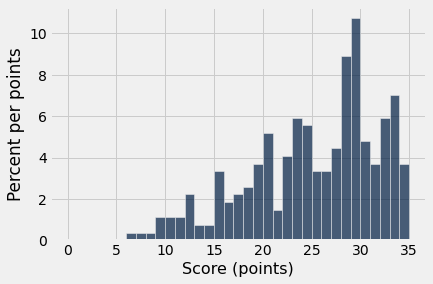

In [9]:
# You complete some code in this cell
precalculus.hist('Score', bins=np.arange(0, 36, 1), unit="points")

In [10]:
# You can complete some code in this cell

## Question for Discussion

Which set of bins makes the most sense to you? Post to the discussion board with your code for creating the histogram and a screenshot, and make a brief argument as for why you think this set of bins is "the best". Please know that there is no "right" answer here, so don't worry about being wrong!

## The `.bin()` method

Use the `.bin` method on the `precalculus` table with bins of width 5, starting at 0 and increasing to 35. How many tests scored between at or above 25 and below 30?

In [11]:
# You complete some code in this cell
precalculus.bin('Score', bins=np.arange(0, 36, 5))

bin,Score count
0,0
5,6
10,16
15,37
20,60
25,83
30,68
35,0
